In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!ls "/content/drive/My Drive/"


'Colab Notebooks'   Test   Train


In [ ]:
!pip install -q keras



In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 16245284470133589210
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14626652160
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 2290483585779531354
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [ ]:
!cat /proc/meminfo

MemTotal:       13290480 kB
MemFree:         7595840 kB
MemAvailable:   11833920 kB
Buffers:          348040 kB
Cached:          4083300 kB
SwapCached:            0 kB
Active:           773588 kB
Inactive:        4494724 kB
Active(anon):       1232 kB
Inactive(anon):   847536 kB
Active(file):     772356 kB
Inactive(file):  3647188 kB
Unevictable:          16 kB
Mlocked:              16 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               284 kB
Writeback:             0 kB
AnonPages:        834232 kB
Mapped:           778292 kB
Shmem:             11788 kB
KReclaimable:     118952 kB
Slab:             166784 kB
SReclaimable:     118952 kB
SUnreclaim:        47832 kB
KernelStack:        5936 kB
PageTables:        12992 kB
SecPageTables:         0 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6645240 kB
Committed_AS:    3177372 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       80308 kB
VmallocChunk:    

In [ ]:
import os
os.chdir("/content/drive/My Drive/app")


In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [ ]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("Train")
data_dir_test = pathlib.Path('Test')

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [ ]:
# Load cell using keras.preprocessing
# Create a dataset
# Define some parameters for the loader

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
# Use 80% of the images for training, and 20% for validation.

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [ ]:
### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

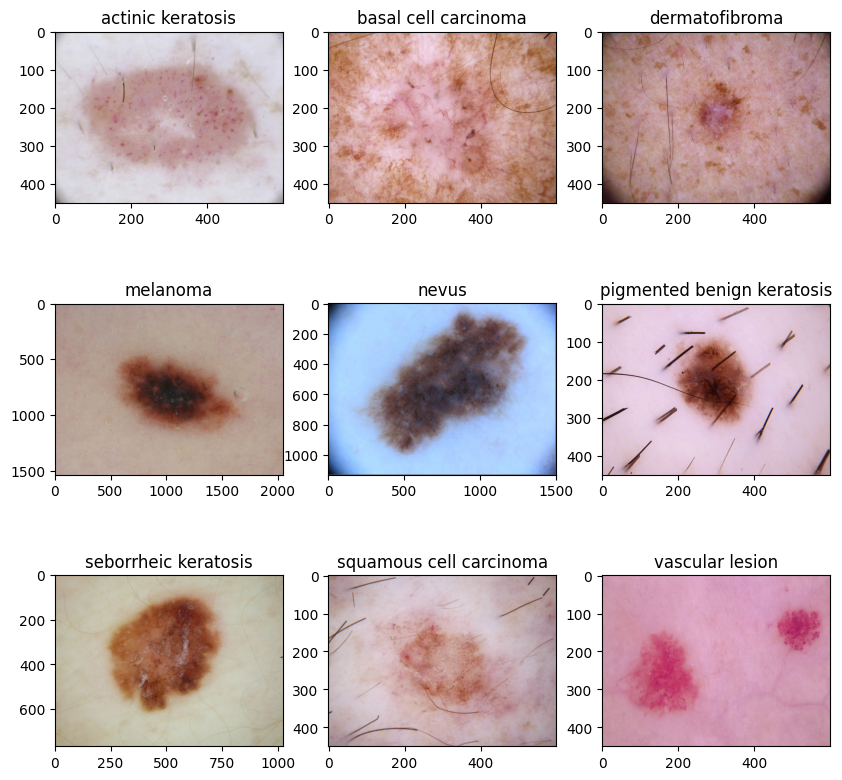

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)
### your code goes here, you can use training or validation data to visualize

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
num_classes = 9

model = Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes,activation='softmax'))

In [ ]:
### Compile the model
# Choose an appropirate optimiser and loss function for model training

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer=tf.keras.optimizers.Adadelta(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 45, 45, 64)       

In [ ]:
## Training the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 40s 228ms/step - loss: 2.0647 - accuracy: 0.2758 - val_loss: 2.0723 - val_accuracy: 0.2784
Epoch 2/20
169/169 [==============================] - 40s 228ms/step - loss: 2.0591 - accuracy: 0.2771 - val_loss: 2.0661 - val_accuracy: 0.2717
Epoch 3/20
169/169 [==============================] - 40s 231ms/step - loss: 2.0534 - accuracy: 0.2767 - val_loss: 2.0610 - val_accuracy: 0.2754
Epoch 4/20
169/169 [==============================] - 41s 233ms/step - loss: 2.0474 - accuracy: 0.2761 - val_loss: 2.0550 - val_accuracy: 0.2732
Epoch 5/20
169/169 [==============================] - 43s 245ms/step - loss: 2.0415 - accuracy: 0.2773 - val_loss: 2.0489 - val_accuracy: 0.2769
Epoch 6/20
169/169 [==============================] - 41s 235ms/step - loss: 2.0355 - accuracy: 0.2810 - val_loss: 2.0425 - val_accuracy: 0.2762
Epoch 7/20
169/169 [==============================] - 39s 226ms/step - loss: 2.0293 - accuracy: 0.2825 - val_loss: 2.0367 - val_ac

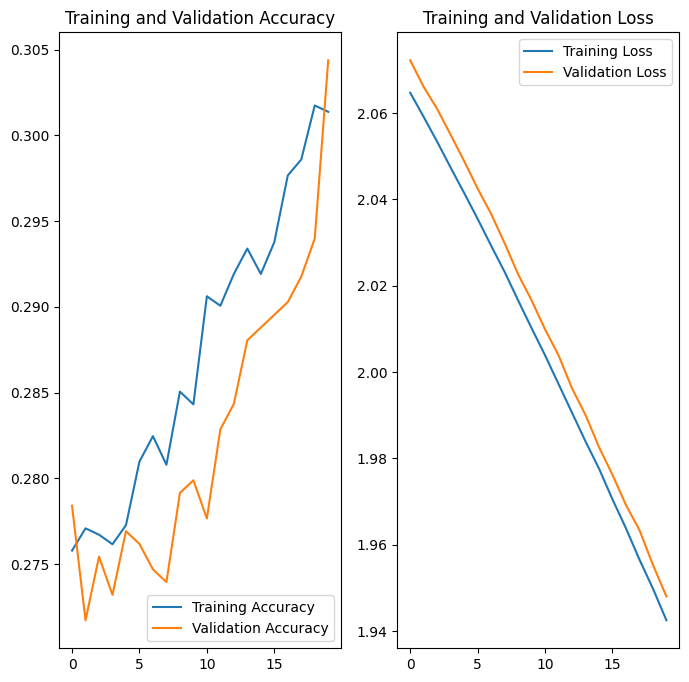

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
## The training and validation accuracy are low. Since the training accuracy and validation accuracy are low, the model seems to be underfitting. The model needs to be tuned. However, since there is not  much difference between training accuracy and validation accuracy, there is no overfitting.

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.

In [ ]:
augmented_image = tf.keras.Sequential([
     layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical",
                                                 input_shape=(img_height,img_width,3)),
     layers.experimental.preprocessing.RandomRotation(0.2)])

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image

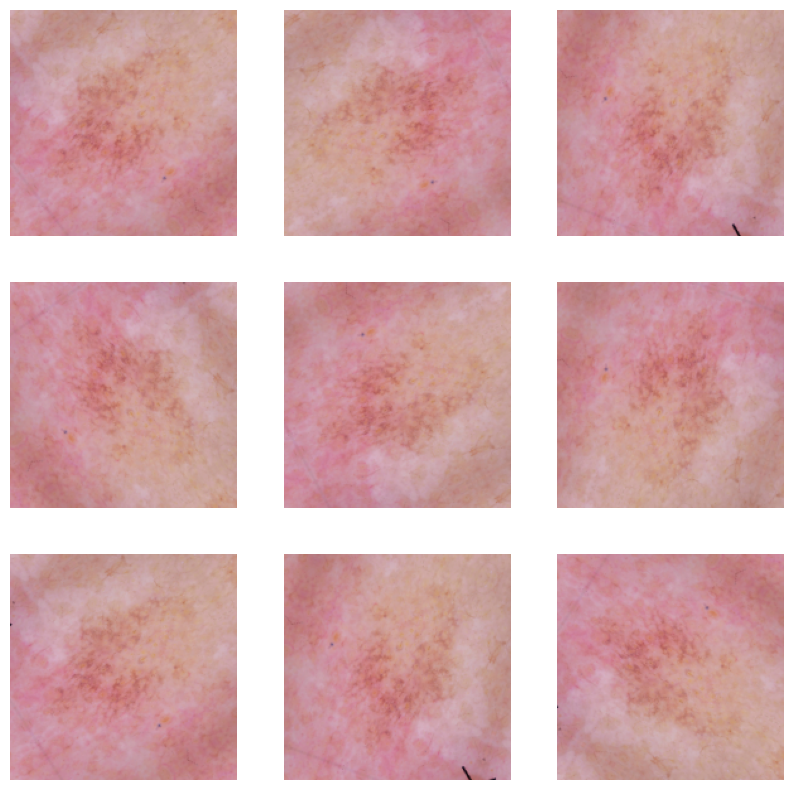

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = augmented_image(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
### Todo:
### Create the model, compile and train the model


In [ ]:
num_classes = 9

model = Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes,activation='softmax'))

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer=tf.keras.optimizers.Adadelta(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

In [ ]:
## Training the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


56/56 [==============================] - 3s 27ms/step - loss: 2.1629 - accuracy: 0.2070 - val_loss: 2.1528 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 1s 24ms/step - loss: 2.1382 - accuracy: 0.2132 - val_loss: 2.1338 - val_accuracy: 0.1700
Epoch 3/20
56/56 [==============================] - 1s 22ms/step - loss: 2.1198 - accuracy: 0.1908 - val_loss: 2.1177 - val_accuracy: 0.1834
Epoch 4/20
56/56 [==============================] - 1s 21ms/step - loss: 2.1033 - accuracy: 0.1987 - val_loss: 2.1035 - val_accuracy: 0.2237
Epoch 5/20
56/56 [==============================] - 1s 21ms/step - loss: 2.0890 - accuracy: 0.2048 - val_loss: 2.0913 - val_accuracy: 0.2103
Epoch 6/20
56/56 [==============================] - 1s 21ms/step - loss: 2.0772 - accuracy: 0.2048 - val_loss: 2.0809 - val_accuracy: 0.2103
Epoch 7/20
56/56 [==============================] - 1s 21ms/step - loss: 2.0666 - accuracy: 0.2042 - val_loss: 2.0722 - val_accuracy: 0.2081
Epoch 8/20
56/56 [======

In [ ]:
### Visualizing the results

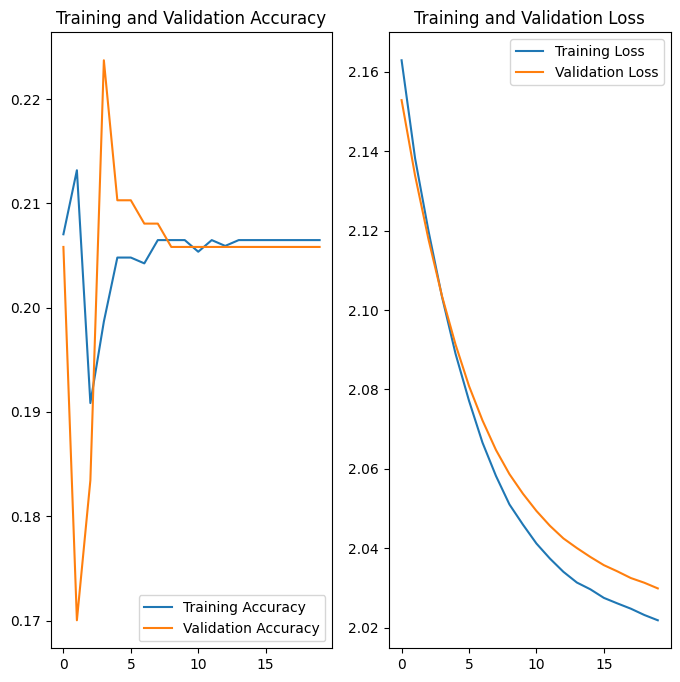

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
## The training and validation accuracy are lower than the previous model. Since the training accuracy and validation accuracy are low, the model seems to be underfitting. The model needs to be tuned. However, since there is not  much difference between training accuracy and validation accuracy, there is no overfitting.

In [ ]:
#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
# images in each classes
class_diff=pd.DataFrame()
for i in range(len(class_names)):
  name= class_names[i]
  number = len(list(data_dir_train.glob(f'{class_names[i]}/*.jpg')))
  class_diff = pd.concat([class_diff, pd.DataFrame({'class': name, 'number': number}, index=[0])], ignore_index=True)

class_diff

,class,number
0,actinic keratosis,114
1,basal cell carcinoma,376
2,dermatofibroma,95
3,melanoma,438
4,nevus,357
5,pigmented benign keratosis,462
6,seborrheic keratosis,77
7,squamous cell carcinoma,181
8,vascular lesion,139


In [ ]:
#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?

#The class 'seborrheic keratosis' has the least number of samples (77).

In [ ]:
#### - Which classes dominate the data in terms proportionate number of samples?

# The class 'pigmented benign keratosis' has the maximum number of samples (462) and hence dominate the dataset.

In [ ]:
!pip install Augmentor

In [ ]:
##To use `Augmentor`, the following general procedure is followed:

# 1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
# 2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
# 3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
path_to_training_dataset="Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE4087E4F40>: 100%|██████████| 500/500 [00:19<00:00, 25.36 Samples/s]


Initialised with 376 image(s) found.
Output directory set to Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FE411427E50>: 100%|██████████| 500/500 [00:17<00:00, 27.91 Samples/s]


Initialised with 95 image(s) found.
Output directory set to Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE47058F580>: 100%|██████████| 500/500 [00:18<00:00, 26.66 Samples/s]


Initialised with 438 image(s) found.
Output directory set to Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FE52C121ED0>: 100%|██████████| 500/500 [01:21<00:00,  6.10 Samples/s]


Initialised with 357 image(s) found.
Output directory set to Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7FE4114728C0>: 100%|██████████| 500/500 [01:19<00:00,  6.29 Samples/s]


Initialised with 462 image(s) found.
Output directory set to Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE52C120D30>: 100%|██████████| 500/500 [00:18<00:00, 27.29 Samples/s]


Initialised with 77 image(s) found.
Output directory set to Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FE4940C1B70>: 100%|██████████| 500/500 [00:41<00:00, 12.05 Samples/s]


Initialised with 181 image(s) found.
Output directory set to Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FE41067B370>: 100%|██████████| 500/500 [00:19<00:00, 25.73 Samples/s]


Initialised with 139 image(s) found.
Output directory set to Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE4097F28F0>: 100%|██████████| 500/500 [00:23<00:00, 20.93 Samples/s]


In [ ]:
# Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [ ]:
### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
from glob import glob

In [ ]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['Train/actinic keratosis/output/actinic keratosis_original_ISIC_0028941.jpg_b10a9d6c-969e-4b36-80b8-0c75e8dc7856.jpg',
 'Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029141.jpg_ecb6e591-c1da-456d-a99f-f692d8e7390d.jpg',
 'Train/actinic keratosis/output/actinic keratosis_original_ISIC_0025825.jpg_df690710-d0cd-4772-b11b-349c7538c4ca.jpg',
 'Train/actinic keratosis/output/actinic keratosis_original_ISIC_0031823.jpg_b987b95b-5399-4d58-b462-2d178b6bf308.jpg',
 'Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027802.jpg_75624ae8-9b18-409b-9bbf-c2a807d8a2f8.jpg',
 'Train/actinic keratosis/output/actinic keratosis_original_ISIC_0031506.jpg_d77614d4-4840-42e2-be52-001856e31061.jpg',
 'Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029210.jpg_f1a89435-c24c-4c15-8b31-b78be55e679c.jpg',
 'Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026626.jpg_ab155396-cf85-463e-8099-8d13919b0941.jpg',
 'Train/actinic keratosis/output/actinic

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [ ]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = df2

In [ ]:
new_df['Label'].value_counts()

Label
actinic keratosis             500
basal cell carcinoma          500
seborrheic keratosis          500
nevus                         500
melanoma                      500
pigmented benign keratosis    500
dermatofibroma                500
vascular lesion               500
squamous cell carcinoma       500
Name: count, dtype: int64

In [ ]:
# So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

In [ ]:
#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
#### **Todo:** Create a training dataset

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [ ]:
#### **Todo:** Create a validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [ ]:
#### **Todo:** Create your model (make sure to include normalization)

In [ ]:
num_classes = 9

model = Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(128,kernel_size=(6,6),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes,activation='softmax'))

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer=tf.keras.optimizers.Adadelta(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_18 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_91 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_91 (MaxPooli  (None, 89, 89, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_92 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_92 (MaxPooli  (None, 43, 43, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_93 (Conv2D)          (None, 38, 38, 128)     

In [ ]:
## Training the model

In [ ]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 42s 234ms/step - loss: 2.1849 - accuracy: 0.1511 - val_loss: 2.1851 - val_accuracy: 0.2042
Epoch 2/30
169/169 [==============================] - 41s 234ms/step - loss: 2.1756 - accuracy: 0.1790 - val_loss: 2.1819 - val_accuracy: 0.2168
Epoch 3/30
169/169 [==============================] - 41s 235ms/step - loss: 2.1715 - accuracy: 0.1953 - val_loss: 2.1792 - val_accuracy: 0.2146
Epoch 4/30
169/169 [==============================] - 43s 247ms/step - loss: 2.1677 - accuracy: 0.1977 - val_loss: 2.1759 - val_accuracy: 0.2301
Epoch 5/30
169/169 [==============================] - 40s 232ms/step - loss: 2.1636 - accuracy: 0.2164 - val_loss: 2.1724 - val_accuracy: 0.2197
Epoch 6/30
169/169 [==============================] - 43s 247ms/step - loss: 2.1590 - accuracy: 0.2231 - val_loss: 2.1674 - val_accuracy: 0.2517
Epoch 7/30
169/169 [==============================] - 41s 236ms/step - loss: 2.1540 - accuracy: 0.2281 - val_loss: 2.1621 - val_ac

In [ ]:
#### **Todo:**  Visualize the model results

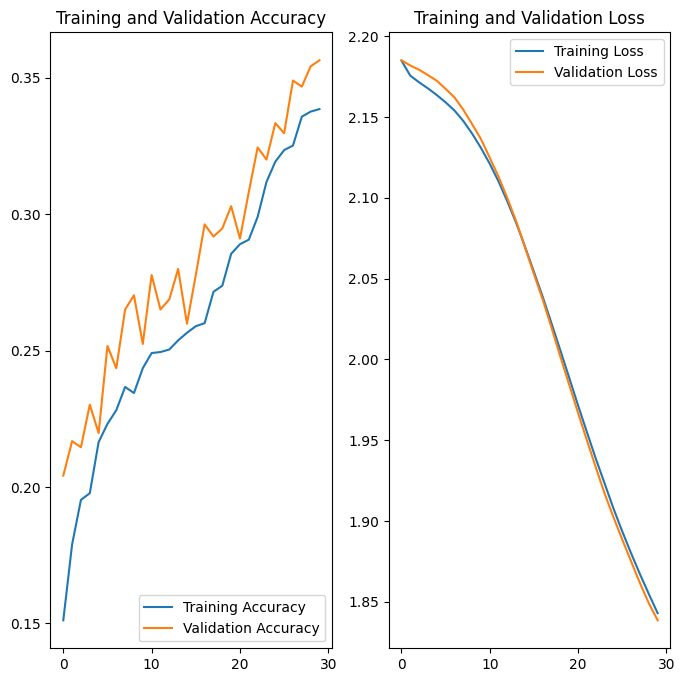

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

In [ ]:
# The accuracy of the model has improved from 27% to 35% after the class imbalance and changes in the model.